# CHECKPOINT 1

In [2]:
import pandas as pd,numpy as np

In [3]:
companies = pd.read_csv("companies.csv", encoding='iso-8859-1')
rounds2 = pd.read_csv("rounds2.csv", encoding='iso-8859-1')

In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
#How many unique companies are present in rounds2?
rounds2["company_permalink"].describe()

count                       114949
unique                       90247
top       /ORGANIZATION/SOLARFLARE
freq                            10
Name: company_permalink, dtype: object

In [7]:
rounds2["funding_round_permalink"].describe()

count                                              114949
unique                                             114949
top       /funding-round/b8de4080acbf0895047bfbb02a784024
freq                                                    1
Name: funding_round_permalink, dtype: object

In [8]:
companies["permalink"].describe()

count                    66368
unique                   66368
top       /Organization/Morsel
freq                         1
Name: permalink, dtype: object

In [18]:
#removing special characters
companies["permalink"] = companies[["permalink"]].applymap(lambda x:x.encode('utf-8').decode('ascii','ignore'))
companies["name"] = companies["name"].str.encode('utf-8').str.decode('ascii','ignore')
rounds2["company_permalink"] = rounds2[["company_permalink"]].applymap(lambda x:x.encode('utf-8').decode('ascii','ignore'))

In [19]:
rounds2["company_permalink"] = rounds2["company_permalink"].apply(lambda x: x.lower())
rounds2["company_permalink"].head(20)

0                     /organization/-fame
1                  /organization/-qounter
2                  /organization/-qounter
3     /organization/-the-one-of-them-inc-
4                   /organization/0-6-com
5          /organization/004-technologies
6        /organization/01games-technology
7     /organization/0ndine-biomedical-inc
8     /organization/0ndine-biomedical-inc
9                    /organization/0xdata
10                   /organization/0xdata
11                   /organization/0xdata
12                   /organization/0xdata
13                        /organization/1
14                        /organization/1
15                        /organization/1
16              /organization/1-2-3-listo
17                  /organization/1-4-all
18         /organization/1-618-technology
19            /organization/1-800-dentist
Name: company_permalink, dtype: object

In [20]:
rounds2["company_permalink"].describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [21]:
companies["permalink"] = companies["permalink"].apply(lambda x: x.lower())
companies["permalink"].describe()

count                                        66368
unique                                       66368
top       /organization/applied-solar-technologies
freq                                             1
Name: permalink, dtype: object

In [22]:
rounds2_drop = rounds2.drop_duplicates(subset='company_permalink', keep='first')
rounds2_drop["company_permalink"].describe()

count                                        66368
unique                                       66368
top       /organization/applied-solar-technologies
freq                                             1
Name: company_permalink, dtype: object

In [23]:
rounds2["company_permalink"].describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [24]:
rounds2["company_permalink"].nunique()

66368

In [65]:
master_frame = pd.merge(rounds2, companies, left_on='company_permalink',right_on='permalink',how='outer')
master_frame.shape

(114949, 16)

# CHECKPOINT 2

In [66]:
master_frame.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [67]:
#need to remove null values in raised_amount_usd
#master_frame = master_frame.dropna(subset=['raised_amount_usd'], inplace=True)
#master_frame[master_frame['raised_amount_usd'].notnull()]
#master_frame[pd.notnull(master_frame['raised_amount_usd'])]
master_frame_1 = master_frame[master_frame['raised_amount_usd'].notna()]
master_frame_1.shape

(94959, 16)

In [68]:
master_frame_1 = master_frame_1[master_frame_1["funding_round_type"].isin(["venture","angel","seed","private_equity"])]
master_frame_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80627 entries, 0 to 114947
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        80627 non-null  object 
 1   funding_round_permalink  80627 non-null  object 
 2   funding_round_type       80627 non-null  object 
 3   funding_round_code       28153 non-null  object 
 4   funded_at                80627 non-null  object 
 5   raised_amount_usd        80627 non-null  float64
 6   permalink                80627 non-null  object 
 7   name                     80626 non-null  object 
 8   homepage_url             77182 non-null  object 
 9   category_list            79772 non-null  object 
 10  status                   80627 non-null  object 
 11  country_code             75606 non-null  object 
 12  state_code               74055 non-null  object 
 13  region                   74564 non-null  object 
 14  city                 

In [69]:
#venture mean after removing outliers 
master_frame_venture = master_frame_1[master_frame_1["funding_round_type"].isin(["venture"])]
Q1_venture = master_frame_venture["raised_amount_usd"].quantile(0.25)
Q3_venture = master_frame_venture["raised_amount_usd"].quantile(0.75)
IQR_venture = Q3_venture - Q1_venture
master_frame_venture = master_frame_venture[~((master_frame_venture["raised_amount_usd"] < (Q1_venture - 1.5 * IQR_venture)) | (master_frame_venture["raised_amount_usd"] > (Q3_venture + 1.5 * IQR_venture)))]
master_frame_venture["raised_amount_usd"].mean()
#master_frame_venture.shape

6430618.40824329

In [70]:
#seed mean after removing outliers
master_frame_seed = master_frame_1[master_frame_1["funding_round_type"].isin(["seed"])]
Q1_seed = master_frame_seed["raised_amount_usd"].quantile(0.25)
Q3_seed = master_frame_seed["raised_amount_usd"].quantile(0.75)
IQR_seed = Q3_seed - Q1_seed
master_frame_seed = master_frame_seed[~((master_frame_seed["raised_amount_usd"] < (Q1_seed - 1.5 * IQR_seed)) | (master_frame_seed["raised_amount_usd"] > (Q3_seed + 1.5 * IQR_seed)))]
master_frame_seed["raised_amount_usd"].mean()

500546.10896198894

In [71]:
#angel mean after removing outliers
master_frame_angel = master_frame_1[master_frame_1["funding_round_type"].isin(["angel"])]
Q1_angel = master_frame_angel["raised_amount_usd"].quantile(0.25)
Q3_angel = master_frame_angel["raised_amount_usd"].quantile(0.75)
IQR_angel = Q3_angel - Q1_angel
master_frame_angel = master_frame_angel[~((master_frame_angel["raised_amount_usd"] < (Q1_angel - 1.5 * IQR_angel)) | (master_frame_angel["raised_amount_usd"] > (Q3_angel + 1.5 * IQR_angel)))]
master_frame_angel["raised_amount_usd"].mean()

533331.2538529282

In [83]:
#private equity after removing outliers
master_frame_private_equity = master_frame_1[master_frame_1["funding_round_type"].isin(["private_equity"])]
Q1_private_equity = master_frame_private_equity["raised_amount_usd"].quantile(0.25)
Q3_private_equity = master_frame_private_equity["raised_amount_usd"].quantile(0.75)
IQR_private_equity = Q3_private_equity - Q1_private_equity
master_frame_private_equity = master_frame_private_equity[~((master_frame_private_equity["raised_amount_usd"] < (Q1_private_equity - 1.5 * IQR_private_equity)) | (master_frame_private_equity["raised_amount_usd"] > (Q3_private_equity + 1.5 * IQR_private_equity)))]
#master_frame_private_equity = master_frame_private_equity[~((master_frame_private_equity["funding_round_type"] < (Q1_private_equity - 1.5 * IQR_private_equity)) | (master_frame_private_equity["raised_amount_usd"] > (Q3_private_equity + 1.5 * IQR_private_equity)))]
master_frame_private_equity["raised_amount_usd"].mean()

34957882.447922595

In [85]:
tmp_1 = master_frame_venture.append(master_frame_seed, ignore_index=True)
tmp_2 = master_frame_angel.append(master_frame_private_equity, ignore_index=True)
master_frame_2 = tmp_1.append(tmp_2, ignore_index=True)
master_frame_2.shape

(74486, 16)

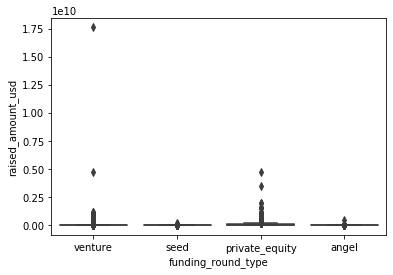

In [78]:
master_frame_1.shape
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(master_frame_1["funding_round_type"], master_frame_1["raised_amount_usd"])
plt.show()

In [79]:
master_frame_1["funding_round_type"].value_counts()

venture           50228
seed              23603
angel              4860
private_equity     1936
Name: funding_round_type, dtype: int64

In [80]:
master_frame_1_check = master_frame_1[(master_frame_1["raised_amount_usd"] <= 15000000.0) & (master_frame_1["raised_amount_usd"] >= 5000000.0)]
master_frame_1_check.groupby("funding_round_type")["raised_amount_usd"].sum().sort_values(ascending=False)

funding_round_type
venture           1.475322e+11
private_equity    3.982620e+09
seed              1.341915e+09
angel             5.192895e+08
Name: raised_amount_usd, dtype: float64

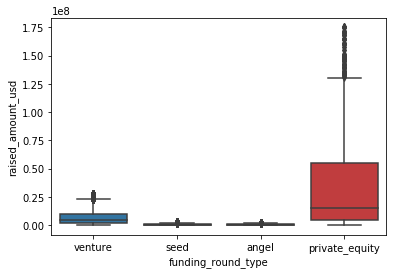

In [86]:
sns.boxplot(master_frame_2["funding_round_type"], master_frame_2["raised_amount_usd"])
plt.show()

In [87]:
master_frame_2["funding_round_type"].value_counts()

venture           45904
seed              22283
angel              4542
private_equity     1757
Name: funding_round_type, dtype: int64

In [88]:
master_frame_2_check = master_frame_2[(master_frame_2["raised_amount_usd"] <= 15000000.0) & (master_frame_2["raised_amount_usd"] >= 5000000.0)]
master_frame_2_check.groupby("funding_round_type")["raised_amount_usd"].sum().sort_values(ascending=False)

funding_round_type
venture           1.475322e+11
private_equity    3.982620e+09
Name: raised_amount_usd, dtype: float64

# CHECKPOINT 3

In [89]:
master_frame_2.head(20)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
3,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
4,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
5,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
6,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
7,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012
8,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013
9,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.0,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010


In [90]:
country = master_frame_2.groupby(["country_code"])["raised_amount_usd"].sum().sort_values(ascending=False).head(9)

In [91]:
country.head(9)

country_code
USA    2.632680e+11
GBR    1.522110e+10
CHN    1.235350e+10
CAN    9.278789e+09
IND    8.274541e+09
ISR    6.507577e+09
FRA    5.598663e+09
DEU    4.459986e+09
CHE    2.255774e+09
Name: raised_amount_usd, dtype: float64

In [92]:
top9 = master_frame_venture.groupby(["country_code"])["raised_amount_usd"].sum().sort_values(ascending=False).head(9)
top9.head(9)

country_code
USA    2.158499e+11
GBR    1.142338e+10
CHN    1.049235e+10
CAN    6.756630e+09
IND    5.654659e+09
ISR    5.393015e+09
FRA    4.818086e+09
DEU    3.539403e+09
CHE    1.580647e+09
Name: raised_amount_usd, dtype: float64

# CHECKPOINT 4

In [93]:
mapping = pd.read_csv("mapping.csv")

In [94]:
mapping.tail(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
678,Web Design,0,0,0,0,0,0,1,0,0
679,Web Development,0,0,0,0,0,0,0,1,0
680,Web Hosting,0,0,0,0,0,0,0,1,0
681,Web Tools,0,0,0,0,0,0,0,1,0
682,Weddings,0,0,0,1,0,0,0,0,0
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0
687,Young Adults,0,0,0,0,0,0,0,1,0


In [101]:
#cleaning mapping file
mapping["category_list"] = mapping["category_list"].astype(str)
#replacing 0 with na
def installs_fun(val):
    return str(val.replace("0","na"))
mapping["category_list"] = mapping["category_list"].apply(installs_fun)

#natural with Natural
def installs_fun_1(val):
    return str(val.replace("natural","Natural"))
mapping["category_list"] = mapping["category_list"].apply(installs_fun_1)

#nanotechnology with Nanotechnology
def installs_fun_2(val):
    return str(val.replace("nanotechnology","Nanotechnology"))
mapping["category_list"] = mapping["category_list"].apply(installs_fun_2)

#navigation with Navigation
def installs_fun_3(val):
    return str(val.replace("navigation","Navigation"))
mapping["category_list"] = mapping["category_list"].apply(installs_fun_3)

#2.na with 2.0
def installs_fun_4(val):
    return str(val.replace("2.na","2.0"))
mapping["category_list"] = mapping["category_list"].apply(installs_fun_4)

mapping.describe()

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,0.031977,0.001453,0.077035,0.129360,0.091570,0.058140,0.104651,0.283430,0.222384
std,0.176066,0.038125,0.266841,0.335843,0.288627,0.234177,0.306326,0.450991,0.416150
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
master_frame_venture["category_list"].tail(30)

114880                         Hardware|Hardware + Software
114881                         Hardware|Hardware + Software
114886                                        Biotechnology
114889                                        Biotechnology
114890                                        Biotechnology
114891                                        Biotechnology
114892                                        Biotechnology
114893                                        Biotechnology
114894                                        Biotechnology
114900                   Crowdsourcing|Knowledge Management
114902    Cloud Computing|Enterprise 2.0|Enterprise Soft...
114903    Cloud Computing|Enterprise 2.0|Enterprise Soft...
114904                                      Pharmaceuticals
114906    Facebook Applications|Games|Networking|Technology
114907    Facebook Applications|Games|Networking|Technology
114908    Facebook Applications|Games|Networking|Technology
114909    Facebook Applications|Games|Ne

In [103]:
master_frame_venture["category_list"] = master_frame_venture["category_list"].astype(str)
master_frame_venture["primary_sector"] = master_frame_venture["category_list"].apply(lambda x:x.split("|")[0])

In [104]:
master_frame_venture["primary_sector"].tail(30)

114880                 Hardware
114881                 Hardware
114886            Biotechnology
114889            Biotechnology
114890            Biotechnology
114891            Biotechnology
114892            Biotechnology
114893            Biotechnology
114894            Biotechnology
114900            Crowdsourcing
114902          Cloud Computing
114903          Cloud Computing
114904          Pharmaceuticals
114906    Facebook Applications
114907    Facebook Applications
114908    Facebook Applications
114909    Facebook Applications
114910    Facebook Applications
114914    Facebook Applications
114915            Biotechnology
114916                 Software
114917                 Software
114920            Biotechnology
114922            Biotechnology
114923            Biotechnology
114931            Biotechnology
114934               E-Commerce
114936            Biotechnology
114937            Biotechnology
114941      Enterprise Software
Name: primary_sector, dtype: object

In [105]:
master_frame_venture.shape

(45904, 17)

In [106]:
x=mapping.iloc[:,1:]

In [107]:
x=x.idxmax(axis=1)

In [108]:
print(x)

0                                       Blanks
1                                Manufacturing
2                                Manufacturing
3                                Manufacturing
4      Social, Finance, Analytics, Advertising
                        ...                   
683                                     Others
684                              Entertainment
685                              Entertainment
686                                     Others
687                                     Others
Length: 688, dtype: object


In [109]:
y=mapping.iloc[:,0]
print(y)

0                   nan
1                    3D
2           3D Printing
3         3D Technology
4            Accounting
             ...       
683           Wholesale
684    Wine And Spirits
685            Wireless
686               Women
687        Young Adults
Name: category_list, Length: 688, dtype: object


In [110]:
# initialize list of lists 
mapping_sector = pd.DataFrame(columns = ['primary_sector', 'main_sector'])
mapping_sector["primary_sector"]  = y
mapping_sector["main_sector"] = x

In [111]:
mapping_sector.tail(20)

,primary_sector,main_sector
668,Video on Demand,Entertainment
669,Video Streaming,Entertainment
670,Virtual Workforces,Entertainment
671,VoIP,Entertainment
672,Waste Management,Cleantech / Semiconductors
673,Watch,Others
674,Water,Cleantech / Semiconductors
675,Water Purification,Cleantech / Semiconductors
676,Wearables,Cleantech / Semiconductors
677,Web Browsers,"News, Search and Messaging"


In [115]:
master_frame_venture_mainsec = pd.merge(master_frame_venture, mapping_sector, on='primary_sector', how='outer')
master_frame_venture_mainsec.shape

(46003, 18)

# CHECKPOINT 5

In [113]:
#the range of funding preferred by Spark Funds is 5 to 15 million USD
mf = master_frame_venture_mainsec[(master_frame_venture_mainsec["raised_amount_usd"] <= 15000000.0) & (master_frame_venture_mainsec["raised_amount_usd"] >= 5000000.0)]

In [114]:
mf.shape

(16598, 18)

In [116]:
d1 = mf[mf["country_code"] == "USA"]
d1.shape

(12150, 18)

In [117]:
d2 = mf[mf["country_code"] == "GBR"]
d2.shape

(628, 18)

In [118]:
d3 = mf[mf["country_code"] == "CAN"]
d3.shape

(426, 18)

# The total amount invested in each main sector in a separate column

In [148]:
d1_amount = d1.groupby("main_sector")["raised_amount_usd"].sum()

In [149]:
print(d1_amount)

main_sector
Automotive & Sports                        1.454104e+09
Blanks                                     7.647633e+08
Cleantech / Semiconductors                 2.163343e+10
Entertainment                              5.099198e+09
Health                                     8.211859e+09
Manufacturing                              7.258553e+09
News, Search and Messaging                 1.397157e+10
Others                                     2.632101e+10
Social, Finance, Analytics, Advertising    2.380738e+10
Name: raised_amount_usd, dtype: float64


In [150]:
d1_df = pd.DataFrame(columns = ['main_sector', 'total raised_amount_usd'])
d1_df['main_sector']  = d1_amount.index
d1_df['total raised_amount_usd'] = d1_amount.values
#d1_df.sort_values(by=["total raised_amount_usd"],ascending=False)

In [153]:
#d1_df.head(10)
d1_df.sort_values(by=["total raised_amount_usd"],ascending=False)

,main_sector,total raised_amount_usd
7,Others,2.632101e+10
8,"Social, Finance, Analytics, Advertising",2.380738e+10
2,Cleantech / Semiconductors,2.163343e+10
6,"News, Search and Messaging",1.397157e+10
4,Health,8.211859e+09
5,Manufacturing,7.258553e+09
3,Entertainment,5.099198e+09
0,Automotive & Sports,1.454104e+09
1,Blanks,7.647633e+08


In [154]:
d1_amount = pd.merge(d1, d1_df, on='main_sector', how='outer')
d1_amount.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total raised_amount_usd
0,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment,5.099198e+09
1,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,5.099198e+09
2,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,5.099198e+09
3,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,5.099198e+09
4,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,Media,Entertainment,5.099198e+09


In [155]:
d2_amount = d2.groupby("main_sector")["raised_amount_usd"].sum()
d2_df = pd.DataFrame(columns = ['main_sector', 'total raised_amount_usd'])
d2_df['main_sector']  = d2_amount.index
d2_df['total raised_amount_usd'] = d2_amount.values
d2_df.sort_values(by=["total raised_amount_usd"],ascending=False)

,main_sector,total raised_amount_usd
7,Others,1.283624e+09
2,Cleantech / Semiconductors,1.163990e+09
8,"Social, Finance, Analytics, Advertising",1.089404e+09
6,"News, Search and Messaging",6.157462e+08
3,Entertainment,4.827847e+08
5,Manufacturing,3.619403e+08
4,Health,2.145375e+08
0,Automotive & Sports,1.670516e+08
1,Blanks,5.776485e+07


In [156]:
d2_amount = pd.merge(d2, d2_df, on='main_sector', how='outer')
d2_amount.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total raised_amount_usd
0,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,482784687.0
1,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,482784687.0
2,/organization/eutechnyx,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,A,13-05-2010,8800000.0,/organization/eutechnyx,Eutechnyx,http://press.eutechnyx.com,Games,operating,GBR,E5,Gateshead,Gateshead,01-01-1987,Games,Entertainment,482784687.0
3,/organization/mind-candy,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,B,01-06-2011,10000000.0,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,Games,Entertainment,482784687.0
4,/organization/mind-candy,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,A,23-11-2006,10860000.0,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,Games,Entertainment,482784687.0


In [158]:
d3_amount = d3.groupby("main_sector")["raised_amount_usd"].sum()
d3_df = pd.DataFrame(columns = ['main_sector', 'total raised_amount_usd'])
d3_df['main_sector']  = d3_amount.index
d3_df['total raised_amount_usd'] = d3_amount.values
d3_df.sort_values(by=["total raised_amount_usd"],ascending=False)
#d3_df.head(10)

,main_sector,total raised_amount_usd
2,Cleantech / Semiconductors,1.015888e+09
7,Others,9.261380e+08
8,"Social, Finance, Analytics, Advertising",6.561431e+08
6,"News, Search and Messaging",4.201211e+08
5,Manufacturing,2.376331e+08
4,Health,1.683451e+08
3,Entertainment,1.600221e+08
1,Blanks,4.771962e+07
0,Automotive & Sports,1.500000e+07


In [159]:
d3_amount = pd.merge(d3, d3_df, on='main_sector', how='outer')
d3_amount.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total raised_amount_usd
0,/organization/500px,/funding-round/344b1e2b60ff76f4548c69ea7c04901f,venture,A,07-08-2013,8800000.0,/organization/500px,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,ON,Toronto,Toronto,01-10-2009,Apps,"News, Search and Messaging",420121113.0
1,/organization/500px,/funding-round/36b2c6975d20b602b5d9ea9724e383ea,venture,B,21-07-2015,13000000.0,/organization/500px,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,ON,Toronto,Toronto,01-10-2009,Apps,"News, Search and Messaging",420121113.0
2,/organization/polar-me,/funding-round/8306cc4e0122a91a0803cb5755be62e0,venture,NaN,23-01-2012,6000000.0,/organization/polar-me,Polar,http://www.polar.me,Apps|Mobile|Software,operating,CAN,ON,Toronto,Toronto,01-11-2007,Apps,"News, Search and Messaging",420121113.0
3,/organization/bitstrips,/funding-round/f495741fc9c3b54a87b0ff0b808d70c0,venture,B,29-10-2014,8000000.0,/organization/bitstrips,Bitstrips,http://www.bitstrips.com,Curated Web|Digital Media|Entertainment|Messaging,operating,CAN,ON,Toronto,Toronto,19-10-2007,Curated Web,"News, Search and Messaging",420121113.0
4,/organization/casero,/funding-round/ae5a91d6dfef3f965d3d412b7714b8b4,venture,A,16-12-2004,7500000.0,/organization/casero,Casero,http://www.casero.com,Curated Web|Internet,acquired,CAN,ON,Toronto,Toronto,01-01-2002,Curated Web,"News, Search and Messaging",420121113.0


# The total number (or count) of investments for each main sector in a separate column

In [160]:
d3_t = d3_amount["main_sector"].value_counts()
d3_total = pd.DataFrame(columns = ['main_sector', 'total_count_investment'])
d3_total['main_sector']  = d3_t.index
d3_total['total_count_investment'] = d3_t.values
d3_final = pd.merge(d3_amount, d3_total, on='main_sector', how='outer')
d3_final.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total raised_amount_usd,total_count_investment
0,/organization/500px,/funding-round/344b1e2b60ff76f4548c69ea7c04901f,venture,A,07-08-2013,8800000.0,/organization/500px,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,ON,Toronto,Toronto,01-10-2009,Apps,"News, Search and Messaging",420121113.0,46
1,/organization/500px,/funding-round/36b2c6975d20b602b5d9ea9724e383ea,venture,B,21-07-2015,13000000.0,/organization/500px,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,ON,Toronto,Toronto,01-10-2009,Apps,"News, Search and Messaging",420121113.0,46
2,/organization/polar-me,/funding-round/8306cc4e0122a91a0803cb5755be62e0,venture,NaN,23-01-2012,6000000.0,/organization/polar-me,Polar,http://www.polar.me,Apps|Mobile|Software,operating,CAN,ON,Toronto,Toronto,01-11-2007,Apps,"News, Search and Messaging",420121113.0,46
3,/organization/bitstrips,/funding-round/f495741fc9c3b54a87b0ff0b808d70c0,venture,B,29-10-2014,8000000.0,/organization/bitstrips,Bitstrips,http://www.bitstrips.com,Curated Web|Digital Media|Entertainment|Messaging,operating,CAN,ON,Toronto,Toronto,19-10-2007,Curated Web,"News, Search and Messaging",420121113.0,46
4,/organization/casero,/funding-round/ae5a91d6dfef3f965d3d412b7714b8b4,venture,A,16-12-2004,7500000.0,/organization/casero,Casero,http://www.casero.com,Curated Web|Internet,acquired,CAN,ON,Toronto,Toronto,01-01-2002,Curated Web,"News, Search and Messaging",420121113.0,46


In [161]:
d2_t = d2_amount["main_sector"].value_counts()
d2_total = pd.DataFrame(columns = ['main_sector', 'total_count_investment'])
d2_total['main_sector']  = d2_t.index
d2_total['total_count_investment'] = d2_t.values
d2_final = pd.merge(d2_amount, d2_total, on='main_sector', how='outer')
d2_final.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total raised_amount_usd,total_count_investment
0,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,482784687.0,56
1,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,482784687.0,56
2,/organization/eutechnyx,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,A,13-05-2010,8800000.0,/organization/eutechnyx,Eutechnyx,http://press.eutechnyx.com,Games,operating,GBR,E5,Gateshead,Gateshead,01-01-1987,Games,Entertainment,482784687.0,56
3,/organization/mind-candy,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,B,01-06-2011,10000000.0,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,Games,Entertainment,482784687.0,56
4,/organization/mind-candy,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,A,23-11-2006,10860000.0,/organization/mind-candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,Games,Entertainment,482784687.0,56


In [162]:
d1_t = d1_amount["main_sector"].value_counts()
d1_total = pd.DataFrame(columns = ['main_sector', 'total_count_investment'])
d1_total['main_sector']  = d1_t.index
d1_total['total_count_investment'] = d1_t.values
d1_final = pd.merge(d1_amount, d1_total, on='main_sector', how='outer')
d1_final.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total raised_amount_usd,total_count_investment
0,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment,5.099198e+09,591.0
1,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,5.099198e+09,591.0
2,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,5.099198e+09,591.0
3,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,5.099198e+09,591.0
4,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,Media,Entertainment,5.099198e+09,591.0


In [163]:
d1_final["main_sector"].value_counts().sort_values(ascending=False).sum()

12149

In [164]:
d2_final["main_sector"].value_counts().sort_values(ascending=False).sum()

628

In [165]:
d3_final["main_sector"].value_counts().sort_values(ascending=False).sum()

426

In [166]:
d1_final["raised_amount_usd"].sum()

108531347515.0

In [167]:
d2_final["raised_amount_usd"].sum()

5436843539.0

In [168]:
d3_final["raised_amount_usd"].sum()

3647009578.0

In [171]:
d1_final["main_sector"].value_counts().sort_values(ascending=False).head(3)

Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
Name: main_sector, dtype: int64

In [172]:
d2_final["main_sector"].value_counts().sort_values(ascending=False).head(3)

Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
Name: main_sector, dtype: int64

In [173]:
d3_final["main_sector"].value_counts().sort_values(ascending=False).head(3)

Cleantech / Semiconductors                 112
Others                                     109
Social, Finance, Analytics, Advertising     78
Name: main_sector, dtype: int64

In [175]:
#For point 3 (top sector count-wise), which company received the highest investment?
d1_final[d1_final["main_sector"] == "Others"].groupby("name")["raised_amount_usd"].sum().sort_values(ascending=False).head(1)

name
Virtustream    64300000.0
Name: raised_amount_usd, dtype: float64

In [176]:
d1_final[d1_final["main_sector"] == "Social, Finance, Analytics, Advertising"].groupby("name")["raised_amount_usd"].sum().sort_values(ascending=False).head(1)

name
SST Inc. (Formerly ShotSpotter)    67933006.0
Name: raised_amount_usd, dtype: float64

In [177]:
d2_final[d2_final["main_sector"] == "Others"].groupby("name")["raised_amount_usd"].sum().sort_values(ascending=False).head(1)

name
Electric Cloud    37000000.0
Name: raised_amount_usd, dtype: float64

In [178]:
d2_final[d2_final["main_sector"] == "Social, Finance, Analytics, Advertising"].groupby("name")["raised_amount_usd"].sum().sort_values(ascending=False).head(1)

name
Celltick Technologies    37500000.0
Name: raised_amount_usd, dtype: float64

In [179]:
d3_final[d3_final["main_sector"] == "Cleantech / Semiconductors"].groupby("name")["raised_amount_usd"].sum().sort_values(ascending=False).head(1)

name
Fresco Microchip    48000000.0
Name: raised_amount_usd, dtype: float64

In [180]:
d3_final[d3_final["main_sector"] == "Others"].groupby("name")["raised_amount_usd"].sum().sort_values(ascending=False).head(1)

name
QuickPlay Media    38700000.0
Name: raised_amount_usd, dtype: float64

# CHECKPOINT 6

funding_round_type
angel              0.654367
private_equity    16.591832
seed               3.012973
venture           79.740828
Name: raised_amount_usd, dtype: float64
funding_round_type
angel               350000.0
private_equity    15000000.0
seed                250000.0
venture            4207368.0
Name: raised_amount_usd, dtype: float64


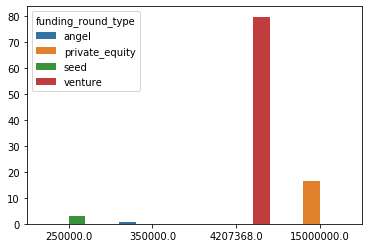

In [192]:
#A plot showing the fraction of total investments (globally) in angel, venture, 
#seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear
#that a certain funding type (FT) is best suited for Spark Funds.
import seaborn as sns
import matplotlib.pyplot as plt
total_investment = (master_frame_2.groupby(["funding_round_type"])["raised_amount_usd"].sum()*100) / master_frame_2["raised_amount_usd"].sum()
avg_investment = master_frame_2.groupby(["funding_round_type"])["raised_amount_usd"].median()
print(total_investment)
print(avg_investment)
plotdf = { 'total_investment' : total_investment.values , 'avg_investment' : avg_investment.values, 'funding_round_type' : avg_investment.index}
sns.barplot(data=plotdf,y='total_investment', x='avg_investment', hue="funding_round_type", estimator= np.sum)
#plot_1 = pd.DataFrame(plotdf, columns = ['total_investment', 'avg_investment'], index=['angel','private_equity','seed','venture'])
#plot_1['total_investment'] = total_investment.values
#plot_1['avg_investment'] = avg_investment.values
#plot_1.plot.bar()
plt.show()

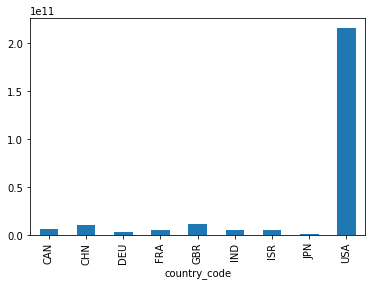

In [182]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT.
#This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.
master_frame_top9 = master_frame_venture[master_frame_venture["country_code"].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]
master_frame_top9.groupby("country_code")["raised_amount_usd"].sum().plot.bar()
plt.show()

In [183]:
#A plot showing the number of investments in the top 3 sectors of 
#the top 3 countries on one chart (for the chosen investment type FT). 
d1_top3 = d1_final["main_sector"].value_counts().sort_values(ascending=False).head(3)
d2_top3 = d2_final["main_sector"].value_counts().sort_values(ascending=False).head(3)
d3_top3 =d3_final["main_sector"].value_counts().sort_values(ascending=False).head(3)
print(d1_top3)
print(d2_top3)
print(d3_top3)

Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
Name: main_sector, dtype: int64
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
Name: main_sector, dtype: int64
Cleantech / Semiconductors                 112
Others                                     109
Social, Finance, Analytics, Advertising     78
Name: main_sector, dtype: int64


In [184]:
d1_top = d1_final[d1_final['main_sector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]
d2_top = d2_final[d2_final['main_sector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]
d3_top = d3_final[d3_final['main_sector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]

In [185]:
dump = d1_top.append(d2_top,ignore_index = True)

In [186]:
data_final = dump.append(d3_top,ignore_index = True)

In [187]:
data_final.shape

(8723, 20)

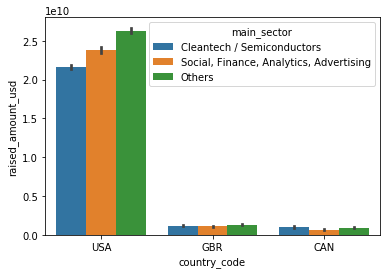

In [188]:
s=sns.barplot(data=data_final,x='country_code', y='raised_amount_usd', hue="main_sector", estimator=np.sum)
plt.show()